#Projeto estapas do processamento do Big Data

O objetivo é rralizar um agrupamento de pessoas de acordo com o grupo de rsco que se encontra baseado no peso e no colesterol.
Para isso, vamos seguir as etapas do processamenro de Big Data



---
**01** Coleta -> **02** Preparação dos Dados -> **03** Análise de Dados -> **04** Modo Analítico -> **05** Visualização



## Coleta dos Dados

Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameoworks e muitas outras fontes.
Para esse ecercício, vamos coletar ja estruturados de dois arquivos. Um arquivo Excel no formado XLXS e outro em csv.

###Coletando dados de estados brasileiros

In [ ]:
# !pip install pandas==1.5.2
# !pip install seaborn==0.12.1
# !pip install matplotlib==3.6.2
# !pip install scikit-learn==1.2.0
# !pip install plotly==5.11.0

In [ ]:
# importanto biblioteca de leitura e tratamento de dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import plotly
from zipfile import ZipFile
import os

# # Montar o Google Drive
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# Leitura dos arquivos CSV com codificação e delimitadores específicos
dados_clinicos = pd.read_csv('/content/dados_clinicos.csv', sep=',', encoding='utf-8')
dados_pacientes = pd.read_csv('/content/dados_pacientes.csv', sep=';', encoding='utf-8')
estado_regiao = pd.read_csv('/content/estado_regiao.csv', sep=';', encoding='latin1')


###Coletando dados de clientes

In [ ]:
#leitura
dados_pacientes.head()

,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754
1,2,50,Autônomo,Superior Incompleto,24,Casado,Branco,1.0,3923
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,4,Divorciado,Branco,0.0,1100
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,24,Casado,Negro,1.0,1100
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,15,Casado,Negro,0.0,3430


In [ ]:
dados_pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


##Preparação dos dados

* Exclua todos os dados ausentes da base de dados clínicos

Para as base de estados e dados de paciente utilize:

* Dados numéricos: média arredondada
* Dados categóricos: moda da variável analisada

In [ ]:
# # Renomear a coluna
# dados_pacientes = dados_pacientes.rename(columns={'ï»¿id_cliente': 'id_cliente'})
# dados_pacientes.head()

In [ ]:
# Informações gerais dos dados
dados_clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  590 non-null    int64  
 1   peso        585 non-null    float64
 2   colesterol  590 non-null    int64  
 3   genero      590 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 18.6+ KB


In [ ]:
# Informações estatísticas
dados_clinicos.describe()

,id_cliente,peso,colesterol
count,590.000000,585.000000,590.000000
mean,283.696610,143.158974,170.067797
std,156.464182,30.925402,39.325409
min,1.000000,95.000000,102.000000
25%,148.250000,116.000000,135.250000
50%,295.500000,140.000000,169.000000
75%,424.750000,171.000000,207.750000
max,547.000000,203.000000,235.000000


In [ ]:
# Informações gerais dos dados
dados_clinicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  590 non-null    int64  
 1   peso        585 non-null    float64
 2   colesterol  590 non-null    int64  
 3   genero      590 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 18.6+ KB


### Analisando dados ausentes

### Verificando valores ausentes/nulos na base

In [ ]:
dados_clinicos.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64

In [ ]:
dados_pacientes.isna().sum()

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos         10
salario              0
dtype: int64

In [ ]:
estado_regiao.isna().sum()

id_estado    0
sigla        0
estado       0
regiao       0
pais         0
dtype: int64

Veriicando os registros com valores nulos

In [ ]:
dados_clinicos.loc[dados_clinicos['peso'].isnull()]

,id_cliente,peso,colesterol,genero
63,64,NaN,211,Masculino
101,102,NaN,230,Feminino
146,147,NaN,171,Masculino
195,196,NaN,143,Feminino
215,216,NaN,180,Masculino


Identificamos 05 valores ausentes na base de dados de clientes. Para esse caso, temos 03 opções para tratamento de dados numericos.



1.   Eliminar os registros;
2.   Média dos pesos dos clientes: Realiza a média dos pesos. OBS.: aA média é fortemente influenciada pela presenta de valores extremos (outliers);
3. Mediana dos pesos dos clientes. Realiza a mediana dos pesos. (medida que pega o valor central dos dados)



### Eliminando os dados ausentes

###DADOS AUSENTES

Para **eliminar** o registro
- Inplace = True signfiica que quer alterar os dados naquele dataframe

In [ ]:
dados_clinicos.dropna(subset=['peso'], inplace=True)

In [ ]:
dados_clinicos.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
dtype: int64

In [ ]:
# Contagem de dados
dados_clinicos.count(0)

id_cliente    585
peso          585
colesterol    585
genero        585
dtype: int64

### Alterando os dados por outras medidas

In [ ]:
dados_pacientes.describe()

,id_cliente,idade,id_estado,qtde_filhos,salario
count,7999.000000,7999.000000,7999.000000,7989.000000,7999.000000
mean,4000.000000,38.477060,14.094012,2.405432,3169.312664
std,2309.256735,13.568667,7.821634,1.703916,3055.862493
min,1.000000,17.000000,1.000000,0.000000,0.000000
25%,2000.500000,28.000000,7.000000,1.000000,1100.000000
50%,4000.000000,37.000000,14.000000,2.000000,2410.000000
75%,5999.500000,47.000000,21.000000,4.000000,3640.500000
max,7999.000000,90.000000,27.000000,5.000000,19994.000000


In [ ]:
# Visualizando a média e mediana da variável qtde_filhos
media = dados_pacientes.qtde_filhos.mean().round()
mediana = dados_pacientes.qtde_filhos.median()

In [ ]:
# Verificando valores
print(f'O valor da média dos pesos é? {media} \nO Valor da mediana é {mediana}')

O valor da média dos pesos é? 2.0 
O Valor da mediana é 2.0


In [ ]:
# Fazendo arredondamento da variável média
round(media,2)

2.0

###Preenchendo os valores ausentes pela média

In [ ]:
dados_pacientes.qtde_filhos.fillna(round(media,2), inplace=True)

In [ ]:
#Verificar se existe algum valor ausente
dados_pacientes.isna().sum()

id_cliente           0
idade                0
classe_trabalho    387
escolaridade         0
id_estado            0
estado_civil         0
raca                 0
qtde_filhos          0
salario              0
dtype: int64

In [ ]:
dados_pacientes.count()

id_cliente         7999
idade              7999
classe_trabalho    7612
escolaridade       7999
id_estado          7999
estado_civil       7999
raca               7999
qtde_filhos        7999
salario            7999
dtype: int64

### Substituindo variável categórica

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados

In [ ]:
print(dados_pacientes.classe_trabalho.value_counts())

Funcionário Setor Privado    5382
Autônomo                      588
Empresário                    496
Servidor Público              299
MEI                           275
Aposentado                    267
Funcionário Público           216
Menor Aprendiz                 85
Desempregado                    3
Estagiário                      1
Name: classe_trabalho, dtype: int64


In [ ]:
# Substituindo os vazios pela moda'

# Encontrar a moda da coluna qualitativa
moda = dados_pacientes['classe_trabalho'].mode()

# Se houver várias modas (valores com a mesma frequência máxima), o método mode() retorna todas elas em uma série
# Você pode converter a série para uma lista para obter todas as modas
moda_lista = moda.tolist()

# Imprimir a moda ou modas
print("Moda da coluna qualitativa:", moda_lista)



Moda da coluna qualitativa: ['Funcionário Setor Privado']


In [ ]:
dados_pacientes.classe_trabalho.fillna('Funcionário Setor Privado', inplace=True)

In [ ]:
dados_pacientes.isna().sum()

id_cliente         0
idade              0
classe_trabalho    0
escolaridade       0
id_estado          0
estado_civil       0
raca               0
qtde_filhos        0
salario            0
dtype: int64

### Duplicados

In [ ]:
# Verificar duplicatas em cada DataFrame e contar a quantidade de duplicatas
quantidade_duplicatas_dados_pacientes = dados_pacientes.duplicated().sum()
quantidade_duplicatas_dados_clinicos = dados_clinicos.duplicated().sum()
quantidade_duplicatas_estado_regiao = estado_regiao.duplicated().sum()

# Mostrar a quantidade de linhas duplicadas em cada DataFrame
print("Quantidade de linhas duplicadas em dados_pacientes:", quantidade_duplicatas_dados_pacientes)
print("Quantidade de linhas duplicadas em dados_clinicos:", quantidade_duplicatas_dados_clinicos)
print("Quantidade de linhas duplicadas em estado_regiao:", quantidade_duplicatas_estado_regiao)


# Verificar duplicatas em todo o DataFrame
duplicatas = dados_clinicos.duplicated()

# Mostrar as linhas duplicadas
print("Linhas duplicadas:")
print(dados_clinicos[duplicatas])


# Remover duplicatas de cada DataFrame
dados_pacientes = dados_pacientes.drop_duplicates()
dados_clinicos = dados_clinicos.drop_duplicates()
estado_regiao = estado_regiao.drop_duplicates()

# Mostrar a quantidade de linhas duplicadas em cada DataFrame
print("Quantidade de linhas duplicadas em dados_pacientes:", dados_clinicos.duplicated().sum())



Quantidade de linhas duplicadas em dados_pacientes: 0
Quantidade de linhas duplicadas em dados_clinicos: 43
Quantidade de linhas duplicadas em estado_regiao: 0
Linhas duplicadas:
     id_cliente   peso  colesterol     genero
547         430  104.0         116  Masculino
548         431  121.0         145  Masculino
549         432  148.0         174  Masculino
550         433  141.0         168   Feminino
551         434  128.0         156   Feminino
552         435  113.0         124   Feminino
553         436  155.0         196   Feminino
554         437  189.0         227   Feminino
555         438  108.0         122  Masculino
556         439   98.0         106  Masculino
557         440  100.0         110   Feminino
558         441  134.0         158  Masculino
559         442  125.0         154  Masculino
560         443  151.0         190   Feminino
561         444  100.0         110   Feminino
562         445  107.0         120  Masculino
563         446  147.0         180  Mas

###Merge

In [ ]:
print(dados_pacientes.head())
print(dados_clinicos.head())
print(estado_regiao.head())

   id_cliente  idade            classe_trabalho             escolaridade  \
0           1     39           Servidor Público    Ensino Médio Completo   
1           2     50                   Autônomo      Superior Incompleto   
2           3     38  Funcionário Setor Privado  Ensino Médio Incompleto   
3           4     53  Funcionário Setor Privado  Ensino Médio Incompleto   
4           5     28  Funcionário Setor Privado    Ensino Médio Completo   

   id_estado estado_civil    raca  qtde_filhos  salario  
0          2     Solteiro  Branco          2.0     4754  
1         24       Casado  Branco          1.0     3923  
2          4   Divorciado  Branco          0.0     1100  
3         24       Casado   Negro          1.0     1100  
4         15       Casado   Negro          0.0     3430  
   id_cliente   peso  colesterol     genero
0           1  102.0         111  Masculino
1           2  115.0         135  Masculino
2           3  115.0         136  Masculino
3           4  140.

In [ ]:
# Mesclar os DataFrames pelo id_cliente e id_estado
merged_df = pd.merge(dados_pacientes, dados_clinicos, on='id_cliente')
df = pd.merge(merged_df, estado_regiao, on='id_estado')

# Exibir o DataFrame mesclado
df.head()


,id_cliente,idade,classe_trabalho,escolaridade,id_estado,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,2,Solteiro,Branco,2.0,4754,102.0,111,Masculino,AL,Alagoas,Nordeste,Brasil
1,27,19,Estagiário,Ensino Médio Incompleto,2,Solteiro,Branco,2.0,1100,108.0,123,Feminino,AL,Alagoas,Nordeste,Brasil
2,111,38,Funcionário Setor Privado,Mestrado,2,Casado,Branco,4.0,6836,131.0,162,Masculino,AL,Alagoas,Nordeste,Brasil
3,144,70,Aposentado,Ensino Médio Completo,2,Solteiro,Branco,4.0,2616,175.0,214,Masculino,AL,Alagoas,Nordeste,Brasil
4,153,21,Funcionário Setor Privado,Ensino Médio Incompleto,2,Solteiro,Branco,3.0,1100,100.0,107,Masculino,AL,Alagoas,Nordeste,Brasil


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 541
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       542 non-null    int64  
 1   idade            542 non-null    int64  
 2   classe_trabalho  542 non-null    object 
 3   escolaridade     542 non-null    object 
 4   id_estado        542 non-null    int64  
 5   estado_civil     542 non-null    object 
 6   raca             542 non-null    object 
 7   qtde_filhos      542 non-null    float64
 8   salario          542 non-null    int64  
 9   peso             542 non-null    float64
 10  colesterol       542 non-null    int64  
 11  genero           542 non-null    object 
 12  sigla            542 non-null    object 
 13  estado           542 non-null    object 
 14  regiao           542 non-null    object 
 15  pais             542 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 72.0+ KB


In [ ]:
quantidade_duplicatas_df = df.duplicated().sum()
quantidade_duplicatas_df

0

In [ ]:
df = df[[
'id_cliente',
'idade',
'classe_trabalho',
'escolaridade',
'estado_civil',
'raca',
'qtde_filhos',
'salario',
'peso',
'colesterol',
'genero',
'sigla',
'estado',
'regiao',
'pais']].sort_values(by='id_cliente')

df.head()

,id_cliente,idade,classe_trabalho,escolaridade,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,Solteiro,Branco,2.0,4754,102.0,111,Masculino,AL,Alagoas,Nordeste,Brasil
22,2,50,Autônomo,Superior Incompleto,Casado,Branco,1.0,3923,115.0,135,Masculino,SC,Santa Catarina,Sul,Brasil
44,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,Divorciado,Branco,0.0,1100,115.0,136,Masculino,AM,Amazonas,Norte,Brasil
23,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,1.0,1100,140.0,167,Feminino,SC,Santa Catarina,Sul,Brasil
66,5,28,Funcionário Setor Privado,Ensino Médio Completo,Casado,Negro,0.0,3430,130.0,158,Masculino,PB,Paraíba,Nordeste,Brasil


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 476
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       542 non-null    int64  
 1   idade            542 non-null    int64  
 2   classe_trabalho  542 non-null    object 
 3   escolaridade     542 non-null    object 
 4   estado_civil     542 non-null    object 
 5   raca             542 non-null    object 
 6   qtde_filhos      542 non-null    float64
 7   salario          542 non-null    int64  
 8   peso             542 non-null    float64
 9   colesterol       542 non-null    int64  
 10  genero           542 non-null    object 
 11  sigla            542 non-null    object 
 12  estado           542 non-null    object 
 13  regiao           542 non-null    object 
 14  pais             542 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 67.8+ KB


In [ ]:
# Reset no Indice
df.reset_index(drop=True)

,id_cliente,idade,classe_trabalho,escolaridade,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,Solteiro,Branco,2.0,4754,102.0,111,Masculino,AL,Alagoas,Nordeste,Brasil
1,2,50,Autônomo,Superior Incompleto,Casado,Branco,1.0,3923,115.0,135,Masculino,SC,Santa Catarina,Sul,Brasil
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,Divorciado,Branco,0.0,1100,115.0,136,Masculino,AM,Amazonas,Norte,Brasil
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,1.0,1100,140.0,167,Feminino,SC,Santa Catarina,Sul,Brasil
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,Casado,Negro,0.0,3430,130.0,158,Masculino,PB,Paraíba,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,Divorciado,Branco,1.0,3533,172.0,207,Masculino,GO,Goiás,Centro-Oeste,Brasil
538,544,36,Autônomo,Ensino Médio Incompleto,Separado,Branco,1.0,1100,129.0,157,Masculino,BA,Bahia,Nordeste,Brasil
539,545,72,Aposentado,Ensino Médio Incompleto,Viúvo,Branco,1.0,4110,107.0,115,Masculino,AC,Acre,Norte,Brasil
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,2.0,1100,117.0,147,Masculino,BA,Bahia,Nordeste,Brasil


### Analisando distribuição dos dados

In [ ]:
# mapas
import matplotlib.pyplot as plt
import plotly.express as px

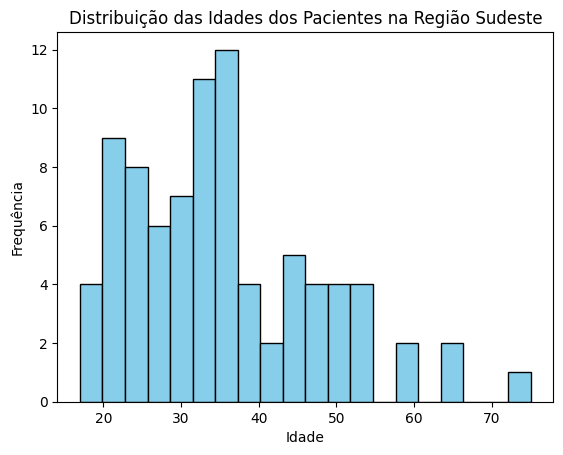

In [ ]:
import matplotlib.pyplot as plt

# Filtrar os dados para incluir apenas pacientes da região Sudeste
pacientes_sudeste = df[df['regiao'] == 'Sudeste']

# Criar o histograma com 20 barras para as idades dos pacientes da região Sudeste
plt.hist(pacientes_sudeste['idade'], bins=20, color='skyblue', edgecolor='black')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição das Idades dos Pacientes na Região Sudeste')

# Mostrar o histograma
plt.show()


In [ ]:
#Elabore um gráfico de dispersão que represente a relação entre a idade e os salários de todos os pacientes, agrupados por gênero. No eixo x, represente o salário, enquanto no eixo y, represente a idade. Posteriormente, analise os resultados obtidos e selecione o gráfico que melhor ilustra essa relação.
import plotly.express as px

# Criar o gráfico de dispersão com Plotly Express
fig = px.scatter(df, x='salario', y='idade', color='genero', title='Relação entre Idade e Salário por Gênero')

# Adicionar rótulos aos eixos
fig.update_xaxes(title='Salário')
fig.update_yaxes(title='Idade')

# Mostrar o gráfico
fig.show()


In [ ]:
#Entre os estados da região Nordeste, qual se destaca pelo maior valor na média das idades?

# Filtrar os dados para incluir apenas pacientes da região Nordeste
pacientes_nordeste = df[df['regiao'] == 'Nordeste']

# Calcular a média das idades para cada estado da região Nordeste
media_idades_por_estado = pacientes_nordeste.groupby('estado')['idade'].mean()

# Identificar o estado com a maior média de idades
estado_maior_media_idades = media_idades_por_estado.idxmax()
maior_media_idades = media_idades_por_estado.max()

print("O estado da região Nordeste que se destaca pelo maior valor na média das idades é:", estado_maior_media_idades)
print("A maior média de idades entre os estados da região Nordeste é:", round(maior_media_idades), 2)


O estado da região Nordeste que se destaca pelo maior valor na média das idades é: Ceará
A maior média de idades entre os estados da região Nordeste é: 43 2


In [ ]:
# Calcular a média salarial para os residentes na região Nordeste
media_salarial_nordeste = round(pacientes_nordeste['salario'].mean(), 2)

print("A média salarial para os residentes na região Nordeste é:", media_salarial_nordeste)


A média salarial para os residentes na região Nordeste é: 3434.85


In [ ]:
# Filtrar os dados para incluir apenas pacientes com grau de escolaridade 'Mestrado'
pacientes_mestrado = df[df['escolaridade'] == 'Mestrado']

# Contar o número de pacientes com grau de escolaridade 'Mestrado' por estado
contagem_mestrado_por_estado = pacientes_mestrado['estado'].value_counts()

# Identificar o estado com o maior número de pacientes com grau de escolaridade 'Mestrado'
estado_maior_numero_mestrado = contagem_mestrado_por_estado.idxmax()
maior_numero_mestrado = contagem_mestrado_por_estado.max()

print("O estado que apresenta o maior número de pacientes com grau de escolaridade 'Mestrado' é:", estado_maior_numero_mestrado)
print("O número de pacientes com grau de escolaridade 'Mestrado' neste estado é:", maior_numero_mestrado)


O estado que apresenta o maior número de pacientes com grau de escolaridade 'Mestrado' é: Santa Catarina
O número de pacientes com grau de escolaridade 'Mestrado' neste estado é: 5


### Machine Learning


É a etapa onde selecionamos os algoritmos de Machine Learning que serão para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestererol, peso e idade das pessoas.

In [ ]:
df = df.reset_index(drop=True)
df

,id_cliente,idade,classe_trabalho,escolaridade,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais
0,1,39,Servidor Público,Ensino Médio Completo,Solteiro,Branco,2.0,4754,102.0,111,Masculino,AL,Alagoas,Nordeste,Brasil
1,2,50,Autônomo,Superior Incompleto,Casado,Branco,1.0,3923,115.0,135,Masculino,SC,Santa Catarina,Sul,Brasil
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,Divorciado,Branco,0.0,1100,115.0,136,Masculino,AM,Amazonas,Norte,Brasil
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,1.0,1100,140.0,167,Feminino,SC,Santa Catarina,Sul,Brasil
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,Casado,Negro,0.0,3430,130.0,158,Masculino,PB,Paraíba,Nordeste,Brasil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,Divorciado,Branco,1.0,3533,172.0,207,Masculino,GO,Goiás,Centro-Oeste,Brasil
538,544,36,Autônomo,Ensino Médio Incompleto,Separado,Branco,1.0,1100,129.0,157,Masculino,BA,Bahia,Nordeste,Brasil
539,545,72,Aposentado,Ensino Médio Incompleto,Viúvo,Branco,1.0,4110,107.0,115,Masculino,AC,Acre,Norte,Brasil
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,2.0,1100,117.0,147,Masculino,BA,Bahia,Nordeste,Brasil


### Aplicando Método do cotovelo

Vamos Iniciar visualizando e identificando o número de clusters necessários para realizar o agrupamento

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
def calcular_wcss(dados_pacientes):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dados_pacientes) # x=dados_pacientes
    wcss.append(kmeans.inertia_)
  return wcss


In [ ]:
df_analise = df[['peso','colesterol']] # base contendo essas colunas



In [ ]:
wcss_pacientes = calcular_wcss(df_analise)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
type(wcss_clientes)

list

In [ ]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_pacientes)):
  print(f'O cluster {i} possui o valor de WCSS de: {wcss_pacientes[i]}')

O cluster 0 possui o valor de WCSS de: 1345138.9833948342
O cluster 1 possui o valor de WCSS de: 326459.1691111843
O cluster 2 possui o valor de WCSS de: 138699.50537699353
O cluster 3 possui o valor de WCSS de: 80254.74760725317
O cluster 4 possui o valor de WCSS de: 53130.85552032027
O cluster 5 possui o valor de WCSS de: 37124.471089909
O cluster 6 possui o valor de WCSS de: 27395.27072924366
O cluster 7 possui o valor de WCSS de: 21793.599301067796
O cluster 8 possui o valor de WCSS de: 16977.408499943595
O cluster 9 possui o valor de WCSS de: 14472.27549586803


### Visualizando o gráfico do cotovelo

In [ ]:
import plotly.express as px # Criação de gráficos dinâmicos
import plotly.offline as py
import plotly.graph_objects as go # Para criação e concatenização de gráficos
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [ ]:
# Ajustar o modelo K-Means com 10 clusters aos dados
kmeans_pacientes = KMeans(n_clusters=3,
                          random_state=42,
                          init='k-means++',
                          n_init=10)
kmeans_pacientes.fit(df[['peso', 'colesterol']])

# Calcular o valor de WCSS para cada número de clusters
wcss_pacientes = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df[['peso', 'colesterol']])
    wcss_pacientes.append(kmeans.inertia_)

# Plotar o gráfico de WCSS versus o número de clusters com Plotly Express
grafico_wcss = px.line(x=range(1, 11),
                       y=wcss_pacientes,
                       labels={'x': 'Número de Clusters', 'y': 'Valor do WCSS'},
                       title='Calculando o WCSS')

# Criar a figura com o gráfico de WCSS
fig = go.Figure(grafico_wcss)

# Atualizar o layout da figura
fig.update_layout(title='Calculando o WCSS',
                  xaxis_title='Número de Clusters',
                  yaxis_title='Valor do WCSS',
                  template='plotly_white')

# Mostrar a figura
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
# Criar uma variável 'kmeans_pacientes', escolher o cluster nº 3, random_state=0 para ter os mesmos resultados - escolhe o n 3 pois é onde começa a ter menos variação da inclinação
kmeans_pacientes = KMeans(n_clusters=3, random_state=42)

# no conjunto 'base_completa' vai ser criado uma variável 'cluster', que vai executar o método KMeans, detemrinar os centroides e os conj. de dados
# e isso será acrescentado no conj. de base de dados do predict
df['cluster']=kmeans_pacientes.fit_predict(df_analise)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df

,id_cliente,idade,classe_trabalho,escolaridade,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais,cluster,nome_cluster
0,1,39,Servidor Público,Ensino Médio Completo,Solteiro,Branco,2.0,4754,102.0,111,Masculino,AL,Alagoas,Nordeste,Brasil,1,Moderado Risco
1,2,50,Autônomo,Superior Incompleto,Casado,Branco,1.0,3923,115.0,135,Masculino,SC,Santa Catarina,Sul,Brasil,1,Moderado Risco
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,Divorciado,Branco,0.0,1100,115.0,136,Masculino,AM,Amazonas,Norte,Brasil,1,Moderado Risco
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,1.0,1100,140.0,167,Feminino,SC,Santa Catarina,Sul,Brasil,0,Alto Risco
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,Casado,Negro,0.0,3430,130.0,158,Masculino,PB,Paraíba,Nordeste,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,Divorciado,Branco,1.0,3533,172.0,207,Masculino,GO,Goiás,Centro-Oeste,Brasil,2,Baixo Risco
538,544,36,Autônomo,Ensino Médio Incompleto,Separado,Branco,1.0,1100,129.0,157,Masculino,BA,Bahia,Nordeste,Brasil,0,Alto Risco
539,545,72,Aposentado,Ensino Médio Incompleto,Viúvo,Branco,1.0,4110,107.0,115,Masculino,AC,Acre,Norte,Brasil,1,Moderado Risco
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,2.0,1100,117.0,147,Masculino,BA,Bahia,Nordeste,Brasil,1,Moderado Risco


In [ ]:
### Caculando os centroides de cada cluster

centroides_clusters = kmeans_pacientes.cluster_centers_
centroides_clusters

# 03 conjuntos (0,1,2): peso, colesterol, idade

array([[141.96174863, 173.22404372],
       [110.4       , 125.88947368],
       [182.18934911, 217.        ]])

*Aqui* temos os centroides dos 03 cluster de acordo com os atributos.
Nesse exemplo, vamos os centroides de 'peso, colesterol' respectivamente.

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Ajustar el modelo K-Means a tus datos
kmeans_pacientes = KMeans(n_clusters=3,
                          random_state=42,
                          init='k-means++',
                          n_init=10)
kmeans_pacientes.fit(df_analise)

# Asignar cada punto de datos a un cluster
clusters = kmeans_pacientes.predict(df_analise)

# Calcular los centroides de los clusters
centroides_clusters = kmeans_pacientes.cluster_centers_

# Crear el gráfico de dispersión con Plotly Express
grafico = px.scatter(x=df_analise['peso'],
                     y=df_analise['colesterol'],
                     color=clusters,
                     labels={'peso': 'Peso', 'colesterol': 'Colesterol', 'color': 'Cluster'},
                     title='Análise de Clusters')

# Crear el gráfico de los centroides de los clusters
grafico_centroide = px.scatter(x=centroides_clusters[:, 0],  # Registro de peso
                               y=centroides_clusters[:, 1],  # Registros de colesterol
                               size=[7, 7, 7])

# Crear la figura combinando el gráfico de dispersión y los centroides
grafico_final = go.Figure(data=grafico.data + grafico_centroide.data)
grafico_final.update_layout(title='Análise de Clusters',
                            xaxis_title='Peso',
                            yaxis_title='Colesterol')

# Mostrar el gráfico final
grafico_final.show()


### Segmentar os clientes baseado nas análises dos clusters
Agora vamos analisar os dados dos clusters referentes aos atributos 'peso' e 'colesterol' e atribuir nomes que representem aquele agrupamento.

Vamos agrupas em 03 grupos

Alto risto: peso e colesterol alto
Baixo risco: Baixo peso e colesterol baixo
Moderado risco: peso e colesterol madianos
Baixo Risco: esse grupo inclui pacientes com características demográficas e biomarcadores associados a um risco relativamente baixo de desenvolvimento de problemas cardiovasculares. Eles podem ter um perfil mais jovem, peso saudável e níveis de colesterol dentro da faixa normal.

Risco Moderado: nesse grupo, encontramos pacientes que possuem algumas características que indicam um risco moderado de problemas cardiovasculares. Eles podem apresentar uma combinação de fatores de risco, como idade mais avançada, peso um pouco acima do ideal e níveis de colesterol elevados, mas ainda dentro de limites considerados moderados.

Risco Alto: este grupo contém pacientes com características que indicam um risco significativamente elevado de desenvolvimento de problemas cardiovasculares. Esses pacientes podem ser mais velhos, apresentar excesso de peso ou obesidade e ter níveis de colesterol muito acima dos limites recomendados.

In [ ]:
cluster_pacientes = df #cópia

In [ ]:
# Segmentando os clientes baseado na análise dos clusters
cluster_pacientes.loc[cluster_pacientes['cluster']==0,'nome_cluster'] = 'Moderado Risco'
cluster_pacientes.loc[cluster_pacientes['cluster']==2,'nome_cluster'] = 'Alto Risco'
cluster_pacientes.loc[cluster_pacientes['cluster']==1,'nome_cluster'] = 'Baixo Risco'
#Localizar a coluna 'cluster', criar uma coluna nova 'nome_cluster' e classificar

In [ ]:
cluster_pacientes

,id_cliente,idade,classe_trabalho,escolaridade,estado_civil,raca,qtde_filhos,salario,peso,colesterol,genero,sigla,estado,regiao,pais,cluster,nome_cluster
0,1,39,Servidor Público,Ensino Médio Completo,Solteiro,Branco,2.0,4754,102.0,111,Masculino,AL,Alagoas,Nordeste,Brasil,1,Baixo Risco
1,2,50,Autônomo,Superior Incompleto,Casado,Branco,1.0,3923,115.0,135,Masculino,SC,Santa Catarina,Sul,Brasil,1,Baixo Risco
2,3,38,Funcionário Setor Privado,Ensino Médio Incompleto,Divorciado,Branco,0.0,1100,115.0,136,Masculino,AM,Amazonas,Norte,Brasil,1,Baixo Risco
3,4,53,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,1.0,1100,140.0,167,Feminino,SC,Santa Catarina,Sul,Brasil,0,Moderado Risco
4,5,28,Funcionário Setor Privado,Ensino Médio Completo,Casado,Negro,0.0,3430,130.0,158,Masculino,PB,Paraíba,Nordeste,Brasil,0,Moderado Risco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,543,46,Autônomo,Ensino Médio Completo,Divorciado,Branco,1.0,3533,172.0,207,Masculino,GO,Goiás,Centro-Oeste,Brasil,2,Alto Risco
538,544,36,Autônomo,Ensino Médio Incompleto,Separado,Branco,1.0,1100,129.0,157,Masculino,BA,Bahia,Nordeste,Brasil,0,Moderado Risco
539,545,72,Aposentado,Ensino Médio Incompleto,Viúvo,Branco,1.0,4110,107.0,115,Masculino,AC,Acre,Norte,Brasil,1,Baixo Risco
540,546,35,Funcionário Setor Privado,Ensino Médio Incompleto,Casado,Negro,2.0,1100,117.0,147,Masculino,BA,Bahia,Nordeste,Brasil,1,Baixo Risco


###Análisar os Clusters criados

In [ ]:
# Após concluir a clusterização dos dados, responda: em qual cluster se encontra o maior número de indivíduos?
contagem_valores = df['nome_cluster'].value_counts()
print(contagem_valores)


Baixo Risco       190
Moderado Risco    183
Alto Risco        169
Name: nome_cluster, dtype: int64


In [ ]:
# Filtrar os dados para incluir apenas pacientes do cluster "Risco Alto" (cluster 2)
pacientes_risco_alto = df[df['cluster'] == 2]

# Calcular a média do peso para os pacientes do cluster "Risco Alto"
media_peso_risco_alto = pacientes_risco_alto['peso'].mean()

print("A média do peso para os pacientes do cluster 'Risco Alto' é:", media_peso_risco_alto)


A média do peso para os pacientes do cluster 'Risco Alto' é: 182.18934911242604


In [ ]:
# Calcular a média de idade para cada cluster
media_idade_por_cluster = []

for cluster in range(3):  # Assumindo que você tem 3 clusters
    media_idade = df[df['cluster'] == cluster]['idade'].mean()  # Corrigido para df['labels']
    media_idade_por_cluster.append(media_idade)

# Identificar o cluster com a menor média de idade
menor_media_idade_cluster = np.argmin(media_idade_por_cluster)

print(media_idade_por_cluster)
print("O grupo que possui a menor média de idade é o cluster:", menor_media_idade_cluster)


[37.21857923497268, 38.642105263157895, 38.14792899408284]
O grupo que possui a menor média de idade é o cluster: 0


In [ ]:
# Calcular a média de salário para cada cluster
media_salario_por_cluster = []

for cluster in range(3):  # Assumindo que você tem 3 clusters
    media_salario = df[df['cluster'] == cluster]['salario'].mean()  # Corrección aquí
    media_salario_por_cluster.append(round(media_salario,2))

print(media_salario_por_cluster)
# Identificar o cluster com a maior média de salário
maior_media_salario_cluster = np.argmax(media_salario_por_cluster)

print("O grupo que possui a maior média de salário é o cluster:", maior_media_salario_cluster)


[3337.78, 3374.25, 3311.98]
O grupo que possui a maior média de salário é o cluster: 1


# Extra


- Convertendo os tipos de dados para Float e Int

1.   to_numeric Método para converter colunas em valores numéricos em Pandas
2.   astype() Método para converter um tipo em qualquer outro tipo de dado
3. infer_objects() Método para converter o tipo de dado das colunas para um tipo mais específico

```
pd.to_numeric(s, downcast='integer'))
df[['second', 'third']].astype(float)

```


- Convertendo , por .
```
df['nome_da_coluna'].replace(",", ".",  inplace=True)
```
- visualizando o tipo de dados
- renomeando colunas